In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pyproj
import numpy as np
import os

/var/folders/dt/4bs9pscx3f71pv28x850v0m80000gn/T/ipykernel_2531/2099607292.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/chuhanli/Documents/GitHub/HousingFoward/data/tri_2020_us.csv")
/opt/homebrew/Caskroom/miniforge/base/envs/venv_tf/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/opt/homebrew/Caskroom/miniforge/base/envs/venv_tf/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.g

<AxesSubplot:>

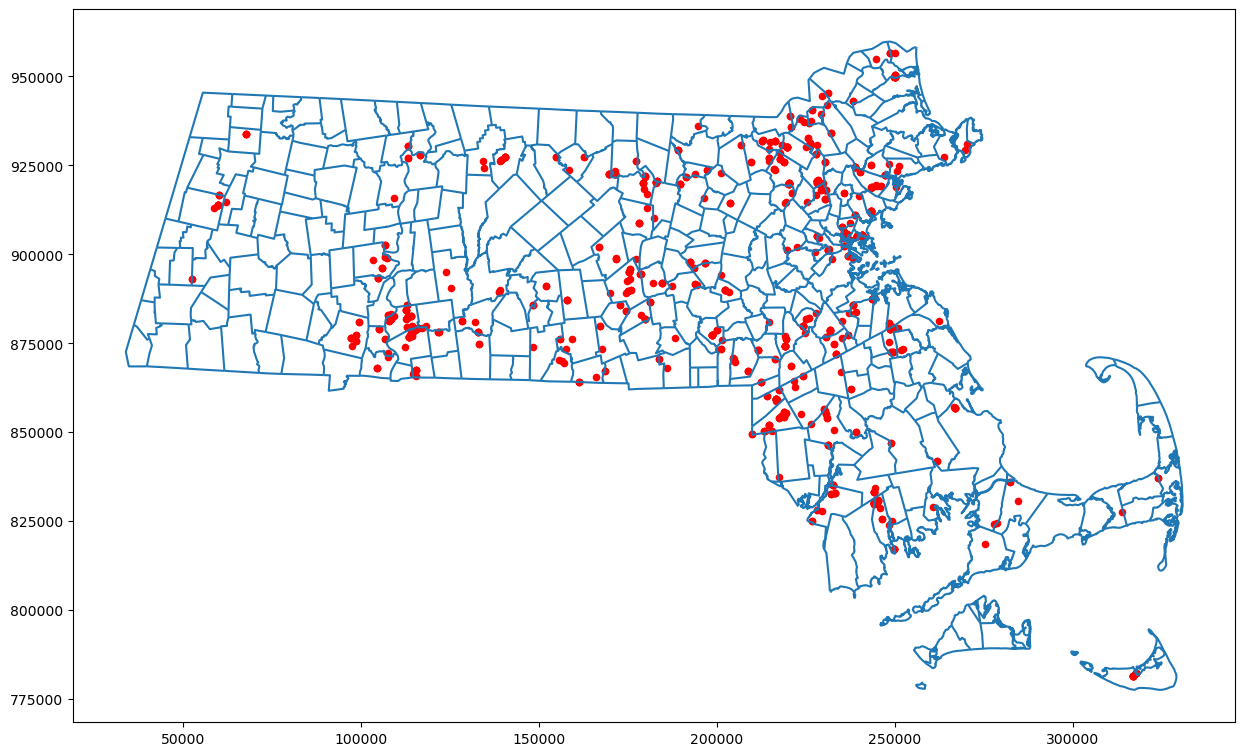

In [51]:
df = pd.read_csv("/Users/chuhanli/Documents/GitHub/HousingFoward/data/tri_2020_us.csv")
df_mass = df[df['8. ST'] == "MA"]
df_mass_small = df_mass[['4. FACILITY NAME', '5. STREET ADDRESS', '6. CITY', '12. LATITUDE', '13. LONGITUDE', '15. PARENT CO NAME', '34. CHEMICAL']]

gdf = gpd.GeoDataFrame(df_mass_small, geometry=gpd.points_from_xy(df_mass_small['13. LONGITUDE'], df_mass_small['12. LATITUDE']))
gdf.crs = {"init": "EPSG:4326"}
gdf_lam = gdf.to_crs({'init': "EPSG:26986"})
mass = gpd.read_file("/Users/chuhanli/Documents/GitHub/HousingFoward/data/townssurvey_shp/TOWNSSURVEY_ARC_GENCOAST.shp")

fig, ax = plt.subplots(figsize = (15, 15))
mass.plot(ax = ax)
gdf_lam.plot(ax = ax, markersize = 20, color = "red")

In [53]:
# change the path as needed :)
path = '/Users/chuhanli/Documents/GitHub/HousingFoward/data/MassGISData/'
river_df = pd.read_csv(os.path.join(path, 'DEP 2018 Integrated List Rivers/GISDATA.IL_2018_ARC_V.csv'))
# commuter_lines_df = pd.read_csv(os.path.join(path, 'Commuter Rail Lines/GISDATA.TRAINS_RTE_TRAIN.csv'))
sewer_df = pd.read_csv(os.path.join(path, 'MWRA Towns With Water or Sewer/GISDATA.MWRASERVICE_POLY.csv'))
commuter_station_df = pd.read_csv(os.path.join(path, 'Commuter Rail Stations/GISDATA.TRAINS_NODE.csv'))
dumping_df = pd.read_csv(os.path.join(path, 'Dumping Grounds by Waste Type Points - Unpermitted Land Disposal/GISDATA.SW_LD_PT.csv'))
MBTA_rapid_transit_df = pd.read_csv(os.path.join(path, 'MBTA Rapid Transit Lines/GISDATA.MBTA_ARC.csv'))
land_disposal_polygons_df = pd.read_csv(os.path.join(path, 'Land Disposal Polygons/GISDATA.SW_LD_POLY.csv'))
land_disposal_polygons_df = pd.read_csv(os.path.join(path, 'Areas of Critical Environmental Concern ACECs/GISDATA.ACECS_POLY.csv'))
todex_df = pd.read_csv('/Users/chuhanli/Documents/GitHub/HousingFoward/data/TodexData.csv')

In [73]:
sewer_df.head()

,FID,code,town_id,town,shape
0,GISDATA.MWRASERVICE_POLY.4,WS,10,ARLINGTON,"POLYGON ((228809.374215357 909528.5208560489, ..."
1,GISDATA.MWRASERVICE_POLY.8,S,14,ASHLAND,"POLYGON ((200240.3342153579 893270.1508560479,..."
2,GISDATA.MWRASERVICE_POLY.12,N,18,AVON,POLYGON ((238434.13421535492 876232.7108560465...
3,GISDATA.MWRASERVICE_POLY.13,N,19,AYER,"POLYGON ((191046.8342153579 925633.6508560479,..."
4,GISDATA.MWRASERVICE_POLY.14,N,1,ABINGTON,POLYGON ((246221.56421535462 878026.2408560477...


In [76]:
commuter_station_df.head()

,FID,station,c_railstat,amtrak,map_sta,shape
0,GISDATA.TRAINS_NODE.51,HARVARD,NaN,NaN,Y,POINT (192188.04688904434 920599.6874975897)
1,GISDATA.TRAINS_NODE.41,BLUE HILL AVENUE,Y,NaN,NaN,POINT (233346.48019396514 891290.8433054946)
2,GISDATA.TRAINS_NODE.52,BEMIS,NaN,NaN,Y,POINT (224749.87501064688 902015.4999898896)
3,GISDATA.TRAINS_NODE.55,SOUTH STATION,Y,Y,Y,POINT (236666.948601678 900202.9207037985)
4,GISDATA.TRAINS_NODE.56,SOUTH STATION,Y,Y,NaN,POINT (236631.2867999822 900199.384003628)


In [77]:
dumping_df.head()

,FID,lnk,reg_obj_id,ro_acct,root_id,site_name,address,town,sw_id,acres,...,l_meth,l_src_1,l_src_2,l_src_3,l_staff,l_prog,l_date,dig_method,orig_fid,shape
0,GISDATA.SW_LD_PT.598,342D,315269,313063,131605,OLIN CORP,51 EAMES ST,WILMINGTON,342.004,2.709670,...,PHO,MS_USGS,AP_DOQ,NaN,MANNO_T,DEP_BAW,2013-08-22T00:00:00,F,349,POINT (228546.1506280601 919261.8679976314)
1,GISDATA.SW_LD_PT.599,269A,39718,172925,172926,SHERBORN LANDFILL,160 NORTH MAIN ST,SHERBORN,269.001,5.371444,...,DD_1,DD_OTH,MS_SKCH,AP_DOQ,MANNO_T,DEP_BAW,2013-08-19T00:00:00,SOI,350,POINT (211255.66898936033 890408.4896131419)
2,GISDATA.SW_LD_PT.604,317A,39860,173056,173058,WELLESLEY LANDFILL,169 GREAT PLAIN AVE,WELLESLEY,317.001,13.799348,...,MAP,MS_SITE,KNOW,NaN,FAIRBROTHER_M,DEP_BAW,2003-11-13T00:00:00,F,355,POINT (218498.78128769994 893061.905393675)
3,GISDATA.SW_LD_PT.605,100E,39283,172527,172528,FRAMINGHAM DUDLEY ROAD LANDFILL,DUDLEY RD,FRAMINGHAM,100.005,8.894887,...,DDS,DD_PAR,DD_SW,AP_DOQ,MANNO_T,DEP_BAW,2010-09-16T00:00:00,PAR,356,POINT (205487.1867012456 892809.6770998389)
4,GISDATA.SW_LD_PT.607,315F,93,169033,169034,OLD WAYLAND DUMP,195 MAIN ST,WAYLAND,315.006,6.726995,...,DDS,DD_PAR,DD_SW,AP_DOQ,MANNO_T,DEP_BAW,2010-09-23T00:00:00,PAR,358,POINT (211257.3977491781 897156.3151109852)


In [78]:
MBTA_rapid_transit_df.head()

,FID,line,route,grade,shape
0,GISDATA.MBTA_ARC.1,SILVER,SL2,3,LINESTRING (238312.4083006233 899673.425001382...
1,GISDATA.MBTA_ARC.2,SILVER,SL2,3,LINESTRING (238304.99999849498 899670.25000049...
2,GISDATA.MBTA_ARC.3,SILVER,SL1 SL2,7,LINESTRING (236634.33619924635 900334.70980152...
3,GISDATA.MBTA_ARC.4,SILVER,SL1 SL2,3,LINESTRING (238133.6261991486 899706.256100930...
4,GISDATA.MBTA_ARC.5,SILVER,SL1 SL2 SL3,3,LINESTRING (238055.05159860104 899733.39089893...


In [80]:
land_disposal_polygons_df.head()

,FID,acecid,name,des_date,secretary,admin_by,region,poly_acres,acec_acres,shape
0,GISDATA.ACECS_POLY.1,13,Rumney Marshes,8/22/88,JAMES S. HOYTE,DCR,COASTAL,2363.46,2785.77,POLYGON ((241113.29421539605 910617.0008560009...
1,GISDATA.ACECS_POLY.2,1,Cedar Swamp,7/3/75,EVELYN F. MURPHY,DCR,INLAND,21.31,1649.70,POLYGON ((195444.38421539962 890887.0008560009...
2,GISDATA.ACECS_POLY.3,1,Cedar Swamp,7/3/75,EVELYN F. MURPHY,DCR,INLAND,1.00,1649.70,POLYGON ((194137.06421539932 890294.3108559996...
3,GISDATA.ACECS_POLY.5,28,Squannassit,12/11/02,ROBERT DURAND,DCR,INLAND,37421.38,37421.38,POLYGON ((177669.65421539545 939754.6808560006...
4,GISDATA.ACECS_POLY.8,23,Neponset River Estuary,3/27/95,TRUDY COXE,DCR,COASTAL,1277.67,1277.67,POLYGON ((237800.20421539992 894630.9308560006...


In [81]:
todex_df.head()

,STATION,Station.order,LINES/ROUTES,Municipalities within station area,Station area (acres),Residential Units,Density (units per acre)
0,Abington,6,Kingston-Plymouth Line,Abington,431.680483,435,1.007690
1,Airport,7,Blue; SL3,Boston,245.485856,4958,20.196683
2,Airport,5,Blue; SL3,Boston,245.485856,4958,20.196683
3,Alewife,1,Red-Ashmont; Red-Braintree,Arlington; Cambridge,406.154647,4749,11.692591
4,Allston Street,22,Green - B,Boston; Brookline,43.487706,1804,41.482989
